In [1]:
rna_enhancers_counts_path = "10X_PBMC/04_count/pbmc_granulocyte_sorted_10k_counts_per_cell.txt"
atac_counts_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_enhancer_counts.mtx"
atac_barcodes_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_barcodes.tsv"
atac_features_path = "10X_PBMC/ATAC/01_count_fragments/pbmc_granulocyte_sorted_10k_features.tsv"
enhancer_per_celltype = c("10X_PBMC/enhancers/enhancer_per_cell_type/CD19+_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/CD20+_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/CD4+_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/CD8+_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/CD14+_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/CD14+_monocyte_enhancers.tsv",
                          "10X_PBMC/enhancers/enhancer_per_cell_type/B_cell_blood_enhancers.tsv")

# eRNA count matrix analysis

In [2]:
library(magrittr)
library(dplyr)
library(stringi)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
setwd(here::here()) # set working directory to project root
getwd()


[1] "/sci/labs/yotamd/lab_share/avishai.wizel/Projects/eRNA"

In [5]:
library(data.table)

rna_enhancers <- data.table::fread(rna_enhancers_counts_path, header = TRUE, sep = "\t", data.table = FALSE)



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [8]:
rownames(rna_enhancers) <- rna_enhancers$gene
rna_enhancers$gene <- NULL
rna_enhancers[1:10, 1:10]
dim(rna_enhancers)

,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,0,0,0,0,0,0,0,0,0
ENSR10_75K6Q4,0,0,0,0,0,0,0,0,0,0
ENSR10_75KNGK,0,0,0,0,0,0,0,0,0,0
ENSR10_75MJTZ,0,0,0,0,0,0,0,0,0,0


[1] 81246 11907

In [9]:
rna_enhancers = as.matrix(rna_enhancers)

In [10]:
# unexpressed cells count
unexpr_cells = colSums(rna_enhancers==0)
paste0("unexpressed cells: ", sum(unexpr_cells==nrow(rna_enhancers))," out of ", ncol(rna_enhancers))
# unexpressed rows count
unexpr_rows = rowSums(rna_enhancers==0)
paste0("unexpressed eRNA: ", sum(unexpr_rows==ncol(rna_enhancers))," out of ", nrow(rna_enhancers))



[1] "unexpressed cells: 0 out of 11907"

[1] "unexpressed eRNA: 0 out of 81246"

In [11]:
# precent of zeros in the matrix
print(paste0(" precent of zeros: ",sum(rna_enhancers == 0) / (nrow(rna_enhancers) * ncol(rna_enhancers))))



[1] " precent of zeros: 0.997858002577356"


In [12]:
# show first 100 sums of cells
colSums(rna_enhancers) %>% head(10)

AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
             419              207              306               61 
AAACAGCCACCAACCG AAACAGCCAGGATAAC AAACAGCCAGTAGGTG AAACAGCCAGTTTACG 
             236              123              647              141 
AAACAGCCATCCAGGT AAACATGCAAGGTCCT 
             337              130

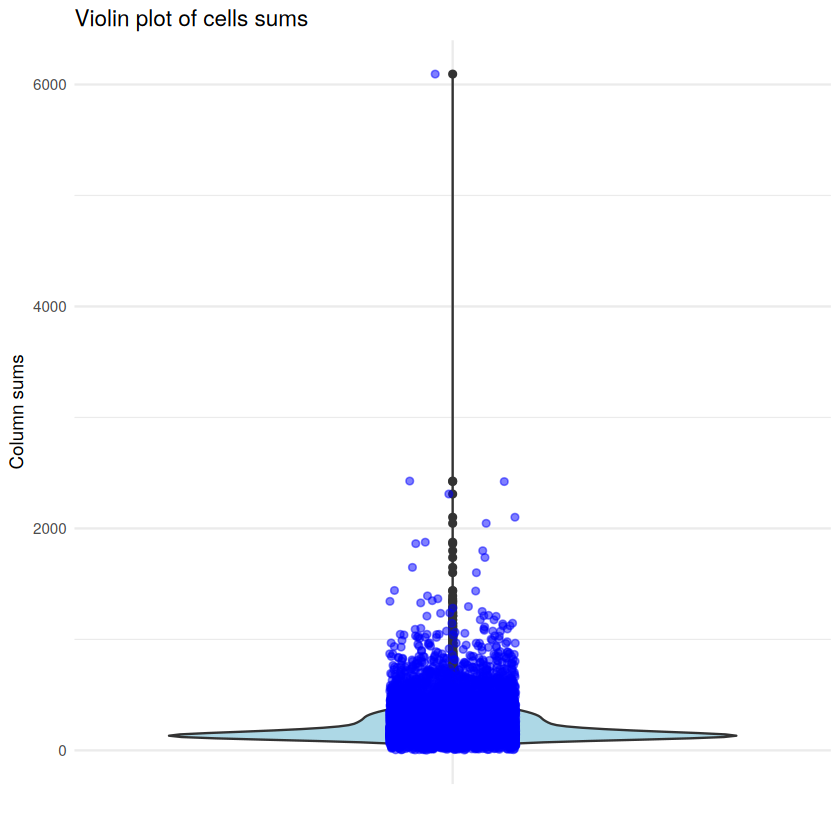

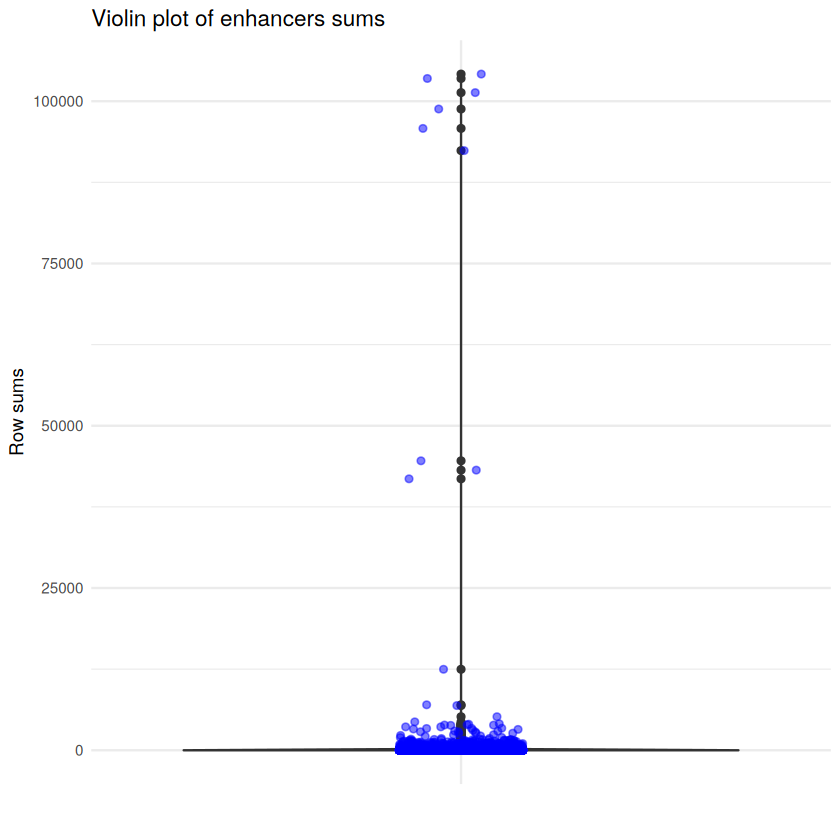

In [10]:
# violin plot of column sums with jittered points
data_cols = data.frame(sum = colSums(rna_enhancers))
library(ggplot2)
p = ggplot(data_cols, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of cells sums", x = "", y = "Column sums") +
  theme_minimal()

print(p)
# violin plot of row sums
data_rows = data.frame(sum = rowSums(rna_enhancers))
p = ggplot(data_rows, aes(x = "", y = sum)) +
  geom_violin(fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "lightgreen") +
  geom_jitter(width = 0.1, alpha = 0.5, color = "blue",height = 0) +
  labs(title = "Violin plot of enhancers sums", x = "", y = "Row sums") +
  theme_minimal()
p


# ATAC counts

In [13]:
atac_counts <- Matrix::readMM(atac_counts_path) %>% as.matrix()


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 15.7 GiB”


In [14]:
atac_counts = as.matrix(atac_counts)

In [15]:
atac_barcodes <- read.table(atac_barcodes_path)
atac_features <- read.table(atac_features_path)
rownames(atac_counts) <- atac_features$V1
colnames(atac_counts) <- atac_barcodes$V1 %>% gsub("-1$", "", .)
atac_counts[1:10, 1:10]
dim(atac_counts)

,CGTTAAATCCACCCTG,TTGCGTCTCGCCTAAG,TAGTAAGCAAGGTAAC,TATGGGCGTTATAGCG,GCCAATTAGGCGGGTA,TTTGACCGTCGTTACT,CGCCTGTGTGCACGCA,CTGGTTACATGTTTGG,CAAGTTATCCGCACAA,GCATTGCCATCACAGC
ENSR1_986,0,0,0,0,0,0,0,0,0,0
ENSR1_B5Q,0,0,0,0,0,0,0,0,0,0
ENSR1_B6N,0,0,0,0,0,0,0,0,0,0
ENSR1_9F7,0,0,0,0,0,0,0,0,0,0
ENSR1_84XG,0,0,0,0,0,0,0,0,0,0
ENSR1_854C,0,0,0,0,0,0,0,0,0,0
ENSR1_93WT,0,0,0,0,0,0,0,0,0,0
ENSR1_B32Q,0,0,0,0,0,0,0,0,0,0
ENSR1_B33F,0,0,0,0,0,0,0,0,0,0
ENSR1_B34B,0,0,0,0,0,0,0,0,0,0


[1] 177340  11909

# Set common cells and features

In [16]:
common_ernas = intersect(rownames(rna_enhancers), rownames(atac_counts))
length(common_ernas)
common_cells = intersect(colnames(rna_enhancers), colnames(atac_counts))
length(common_cells)

[1] 81246

[1] 11907

In [17]:
#set common rownames and colnames
rna_enhancers = rna_enhancers[common_ernas, common_cells]
atac_counts = atac_counts[common_ernas, common_cells]

In [18]:
# clear objects to save memory
rm(atac_barcodes, atac_features)
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1962214,104.8,3615370,193.1,3615370,193.1
Vcells,1455147084,11101.9,4524551904,34519.6,4715263310,35974.7


In [19]:
class(rna_enhancers)
class(atac_counts)



[1] "matrix" "array"

[1] "matrix" "array"

In [17]:
#take small subset for testing
# rna_enhancers = rna_enhancers[1:1000, 1:1000] %>% as.matrix()
# atac_counts = atac_counts[1:1000, 1:1000] %>% as.matrix()

In [20]:
head(atac_counts)
head(rna_enhancers)
class(rna_enhancers)
class(atac_counts)
dim(rna_enhancers)
dim(atac_counts)

,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT,⋯,TTTGTGTTCTCCATAT,TTTGTTGGTCAGGAAG,TTTGTTGGTCCACAAA,TTTGTTGGTCTTTATG,TTTGTTGGTGACATGC,TTTGTTGGTGTTAAAC,TTTGTTGGTTAGGATT,TTTGTTGGTTGCAGTA,TTTGTTGGTTGGTTAG,TTTGTTGGTTTGCAGA
ENSR10_739T55,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,1,0,0,0,1,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,1,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,0


,AAACAGCCAAGGAATC,AAACAGCCAATCCCTT,AAACAGCCAATGCGCT,AAACAGCCACACTAAT,AAACAGCCACCAACCG,AAACAGCCAGGATAAC,AAACAGCCAGTAGGTG,AAACAGCCAGTTTACG,AAACAGCCATCCAGGT,AAACATGCAAGGTCCT,⋯,TTTGTGTTCTCCATAT,TTTGTTGGTCAGGAAG,TTTGTTGGTCCACAAA,TTTGTTGGTCTTTATG,TTTGTTGGTGACATGC,TTTGTTGGTGTTAAAC,TTTGTTGGTTAGGATT,TTTGTTGGTTGCAGTA,TTTGTTGGTTGGTTAG,TTTGTTGGTTTGCAGA
ENSR10_739T55,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73C2H3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73MXBJ,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_73PWXH,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74JXL6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENSR10_74XTX8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] "matrix" "array"

[1] "matrix" "array"

[1] 81246 11907

[1] 81246 11907

In [21]:
# read enhancer per cell type files
library(stringi)
library(data.table)
enhancer_per_celltype_list = list()
for (file in enhancer_per_celltype) {
  cell_type = stri_split_fixed(basename(file), "_enhancers.tsv")[[1]][1]
  enhancers = fread(file, header = FALSE, data.table = FALSE)[,1]
  enhancer_per_celltype_list[[cell_type]] = enhancers
}

In [22]:
names(enhancer_per_celltype_list) %>% head()
enhancer_per_celltype_list[[1]][1:10]

[1] "CD19+"          "CD20+"          "CD4+"           "CD8+"          
[5] "CD14+"          "CD14+_monocyte"

[1] "ENSR1_B7D6"  "ENSR1_8SJ6"  "ENSR1_C58F"  "ENSR1_BCG8"  "ENSR1_BDXS" 
 [6] "ENSR1_9SWG"  "ENSR1_9TCN"  "ENSR1_83PPN" "ENSR1_9TCZ"  "ENSR1_9TT9"

In [23]:
all_pbmc_enhancers = unique(unlist(enhancer_per_celltype_list))
length(all_pbmc_enhancers)
all_pbmc_enhancers = intersect(all_pbmc_enhancers, common_ernas)
length(all_pbmc_enhancers)

[1] 18225

[1] 11807

In [24]:
atac_counts_filtered = atac_counts[all_pbmc_enhancers, ]
rna_enhancers_filtered = rna_enhancers[all_pbmc_enhancers, ]
dim(atac_counts_filtered)
dim(rna_enhancers_filtered)

[1] 11807 11907

[1] 11807 11907

# Binarize and filtering

In [25]:
atac_counts_filtered[atac_counts_filtered > 0] <- 1
rna_enhancers_filtered[rna_enhancers_filtered > 0] <- 1

In [26]:
# keep only rows that expressed in at least 10 cells
rows_to_keep = which(rowSums(rna_enhancers_filtered) >= 10)
length(rows_to_keep)
atac_counts = atac_counts_filtered[rows_to_keep, ]
rna_enhancers = rna_enhancers_filtered[rows_to_keep, ]

[1] 5303

In [27]:
# remove all 0 cells
zero_cells = colSums(atac_counts) == 0 | colSums(rna_enhancers) == 0
atac_counts = atac_counts[, !zero_cells]
rna_enhancers = rna_enhancers[, !zero_cells]

In [28]:
dim(atac_counts)
dim(rna_enhancers)

[1]  5303 11852

[1]  5303 11852

In [29]:
# Jaccard Index = TP / (TP + FP + FN)
calculate_jaccard <- function(v1, v2) {
    # Check for perfect length match (safety check)
    if (length(v1) != length(v2)) stop("Vectors must be of equal length.")
    
    # True Positives (TP): Both are 1
    TP <- sum(v1 == 1 & v2 == 1)
    
    # Union Size (TP + FP + FN): At least one is 1
    union_size <- sum(v1 == 1 | v2 == 1)
    # Handle the edge case where a cell has zero activity across all 11,909 enhancers
    if (union_size == 0) return(0)  
    return(TP / union_size)
}

In [30]:
phi_per_cell <- mapply(function(x, y){cor(x, y)}, as.data.frame(rna_enhancers), as.data.frame(atac_counts))


In [31]:

head(phi_per_cell)


AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
     0.046763606      0.058311395      0.001037103     -0.003542911 
AAACAGCCACCAACCG AAACAGCCAGGATAAC 
    -0.010120739     -0.007778610

In [32]:
jaccard_per_cell = mapply(function(x, y){calculate_jaccard(x, y)}, as.data.frame(rna_enhancers), as.data.frame(atac_counts))

In [33]:
head(jaccard_per_cell)

AAACAGCCAAGGAATC AAACAGCCAATCCCTT AAACAGCCAATGCGCT AAACAGCCACACTAAT 
     0.022058824      0.023178808      0.006644518      0.000000000 
AAACAGCCACCAACCG AAACAGCCAGGATAAC 
     0.000000000      0.000000000

In [34]:
results_df <- data.frame(
    Phi = phi_per_cell,
    Jaccard = jaccard_per_cell
)

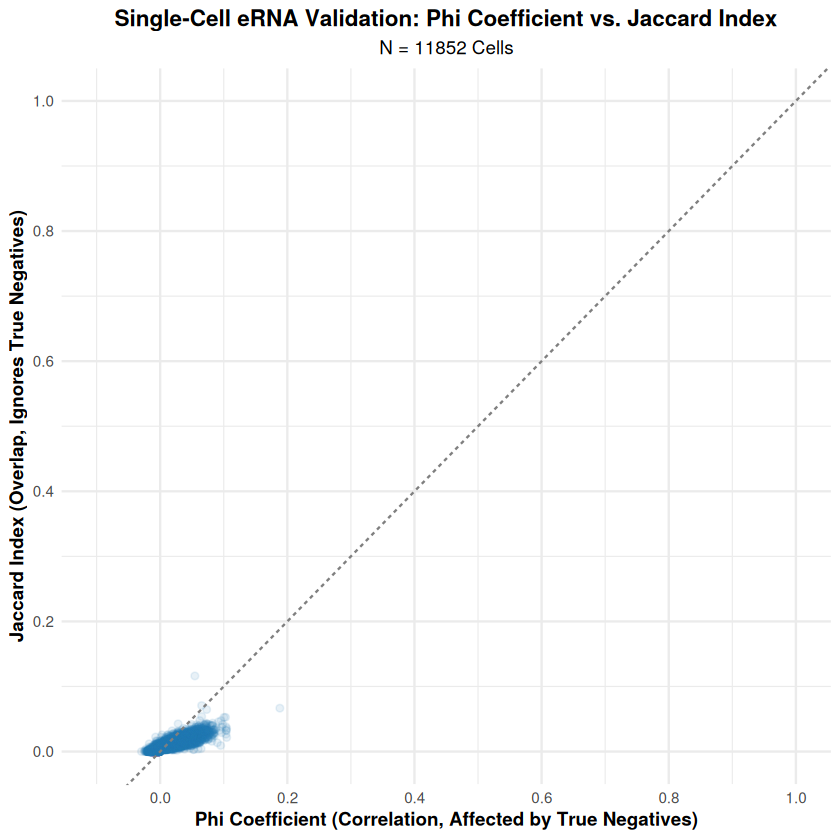

In [38]:
ggplot(results_df, aes(x = Phi, y = Jaccard)) +
    
    # 1. Scatter points with transparency (crucial for large datasets)
    # Using geom_point with high alpha to show point density.
    geom_point(alpha = 0.1, size = 1.5, color = "#1f78b4") + 
    

    
    # 3. Add the identity line (y = x) for comparison
    geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray50") +
    
    # 4. Define axis limits and labels
    scale_x_continuous(limits = c(-0.1, 1), breaks = seq(0, 1, 0.2)) + 
    scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.2)) + 
    
    labs(
        title = "Single-Cell eRNA Validation: Phi Coefficient vs. Jaccard Index",
        subtitle = paste0("N = ", nrow(results_df), " Cells"),
        x = "Phi Coefficient (Correlation, Affected by True Negatives)",
        y = "Jaccard Index (Overlap, Ignores True Negatives)"
    ) +
    
    # 5. Apply a clean theme
    theme_minimal() +
    theme(
        plot.title = element_text(face = "bold", hjust = 0.5),
        plot.subtitle = element_text(hjust = 0.5),
        axis.title = element_text(face = "bold")
    )

In [39]:

contingency_table <- table(c(as.matrix(atac_counts)),c(as.matrix(rna_enhancers)))
contingency_table

   
           0        1
  0 59122322   344392
  1  3340585    43857

In [41]:
test <- fisher.test(contingency_table)
test


	Fisher's Exact Test for Count Data

data:  contingency_table
p-value < 2.2e-16
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 2.231187 2.276343
sample estimates:
odds ratio 
  2.253873 


In [42]:
# histogram of fisher per cell p-values with ggplot2
library(ggplot2)
fisher_per_cell_test = function(x, y){
    fisher.test(table(x, y))$p.value
}
fisher_per_cell = mapply(fisher_per_cell_test, as.data.frame(rna_enhancers), as.data.frame(atac_counts))



[1] "Number of cells with significant association (FDR < 0.05): 473 out of 11852"


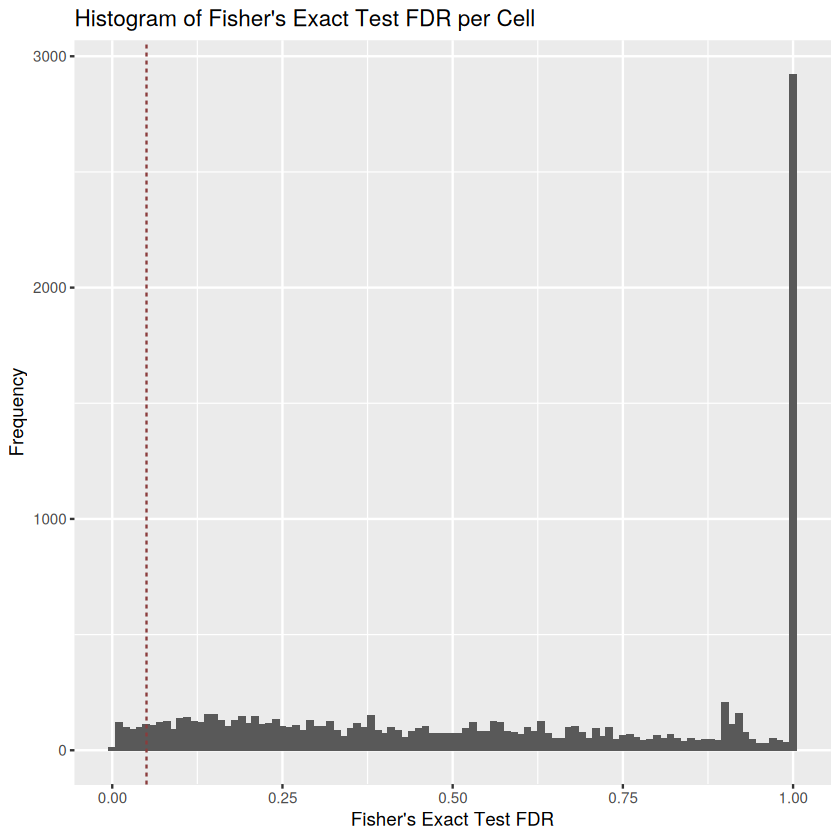

In [43]:
# create a data frame for plotting
fisher_df = data.frame(fdr = p.adjust(fisher_per_cell,method = "fdr"))

# plot the histogram
ggplot(fisher_df, aes(x = fdr)) +
    geom_histogram(binwidth = 0.01) +
    xlab("Fisher's Exact Test FDR") +
    ylab("Frequency") +
    # add line at 0.05 significance level
    geom_vline(xintercept = 0.05, color = "#8a3c3c", linetype = "dashed") +
    ggtitle("Histogram of Fisher's Exact Test FDR per Cell")

#count cells with significant FDR < 0.05
significant_cells = sum(fisher_df$fdr < 0.05)
print(paste0("Number of cells with significant association (FDR < 0.05): ", significant_cells, " out of ", length(fisher_per_cell)))

In [44]:
# histogram of fisher per enhancer p-values with ggplot2
library(ggplot2)
fisher_per_enhancer_test = function(x, y){
    tryCatch(fisher.test(table(x, y))$p.value, error = function(e) NA)
}
fisher_per_enhancer = mapply(fisher_per_enhancer_test, as.data.frame(t(rna_enhancers)), as.data.frame(t(atac_counts)))



[1] "Number of enhancers with significant association (FDR < 0.05): 475 out of 5277"


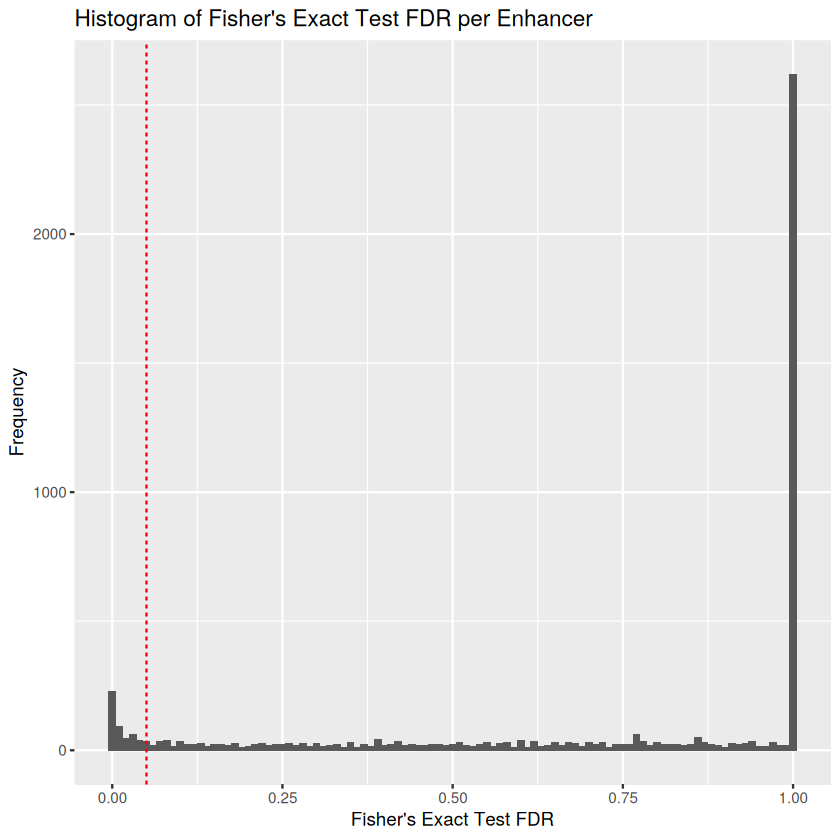

In [45]:
fisher_per_enhancer = na.omit(fisher_per_enhancer)
# create a data frame for plotting
fisher_df = data.frame(fdr = p.adjust(fisher_per_enhancer,method = "fdr"))

# plot the histogram
ggplot(fisher_df, aes(x = fdr)) +
    geom_histogram(binwidth = 0.01) +
    xlab("Fisher's Exact Test FDR") +
    ylab("Frequency") +
    # add line at 0.05 significance level
    geom_vline(xintercept = 0.05, color = "red", linetype = "dashed") +
    ggtitle("Histogram of Fisher's Exact Test FDR per Enhancer")

#count enhancers with significant FDR < 0.05
significant_enhancers = sum(fisher_df$fdr < 0.05)
print(paste0("Number of enhancers with significant association (FDR < 0.05): ", significant_enhancers, " out of ", length(fisher_per_enhancer)))